# 1.Salary Data

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('SalaryData_Train(1).csv')
test_data = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
train_data.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
print(train_data.shape)
print(test_data.shape)

(30161, 14)
(15060, 14)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Data Visualization

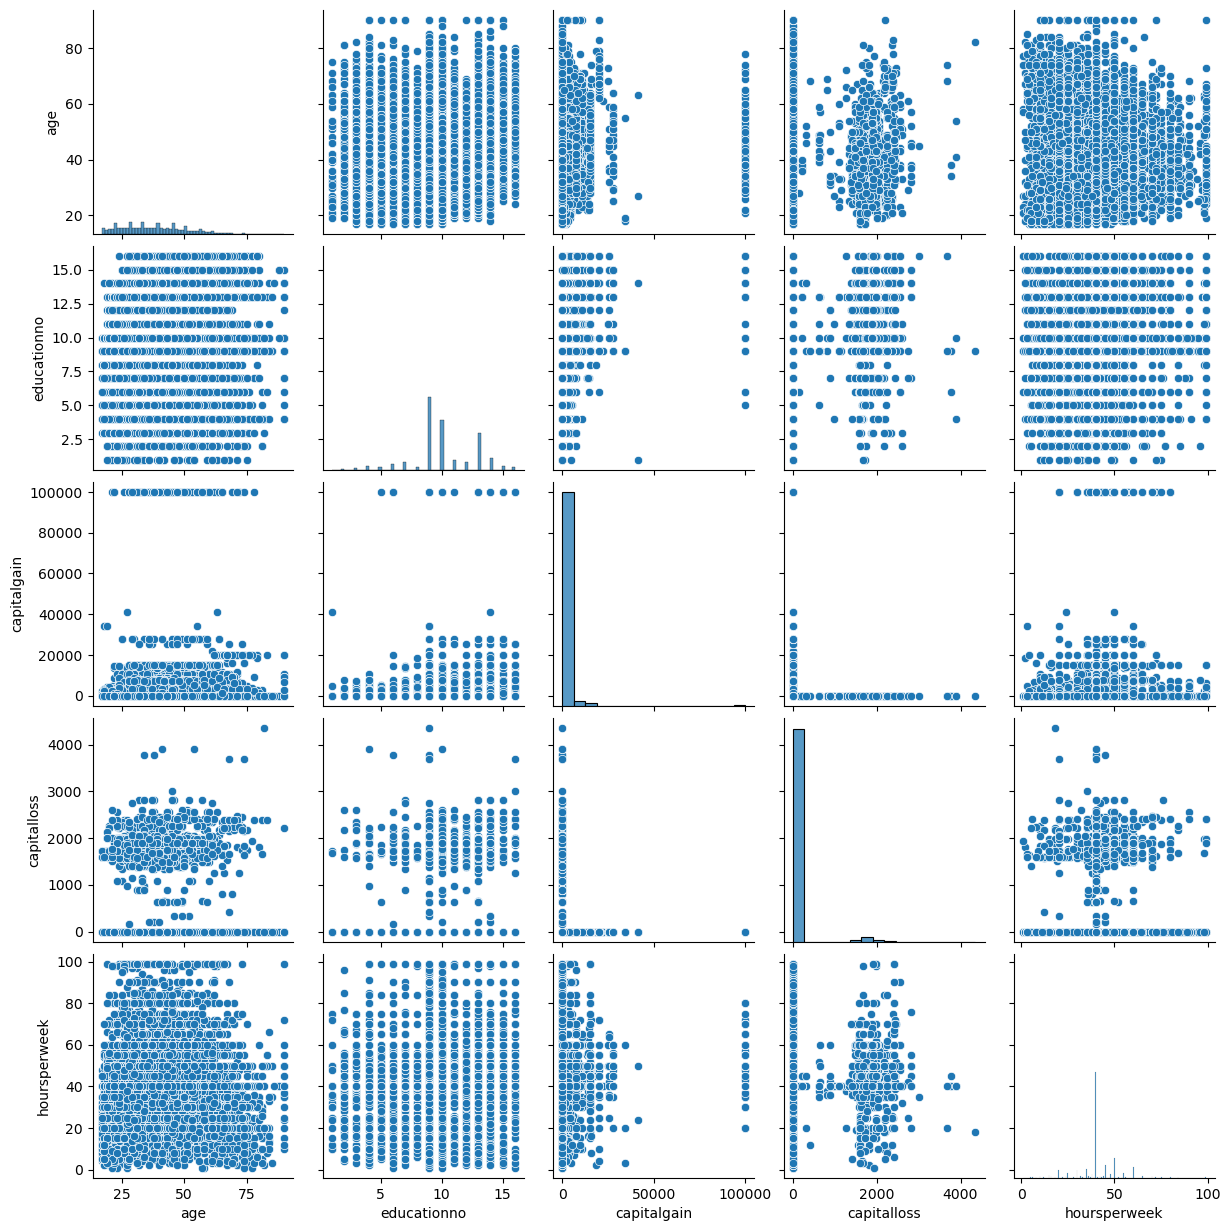

In [8]:
sns.pairplot(train_data)
plt.show()

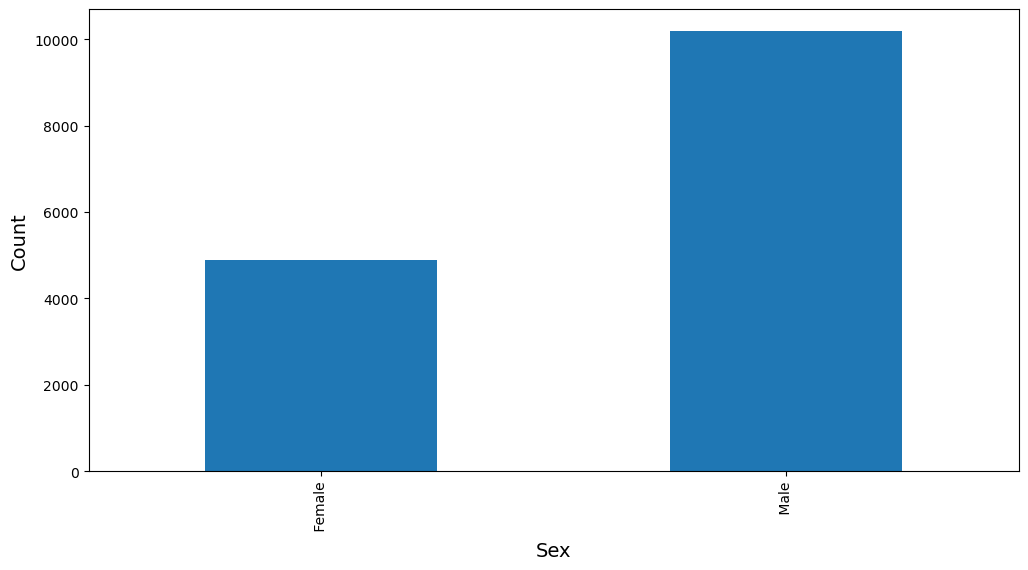

In [9]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['sex']).mean().plot(kind='bar')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

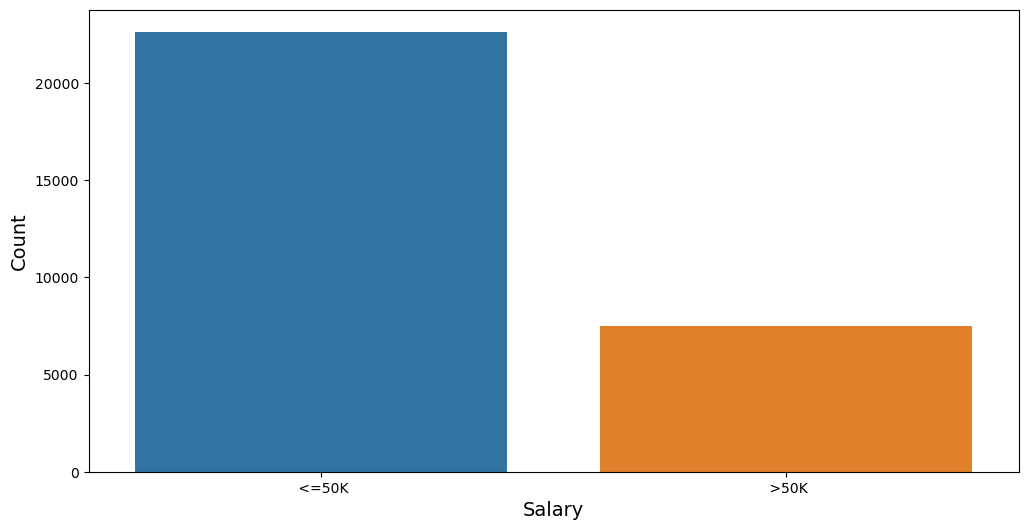

In [10]:
plt.rcParams["figure.figsize"] = (12,6)
sns.countplot(x='Salary', data= train_data)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Text(0, 0.5, 'Count')

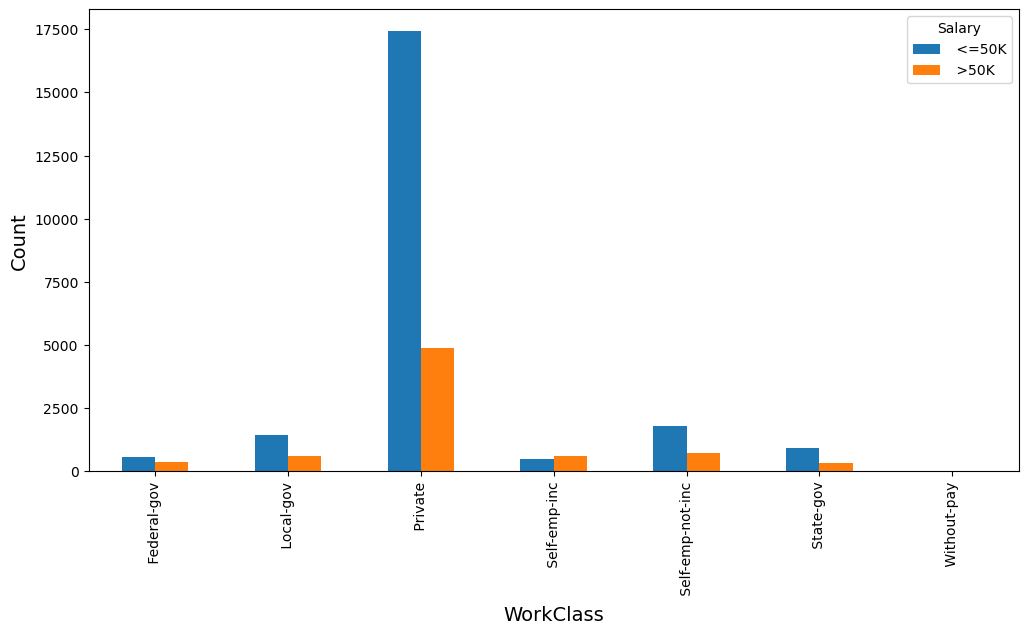

In [11]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data.workclass,train_data.Salary).plot(kind="bar")
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)

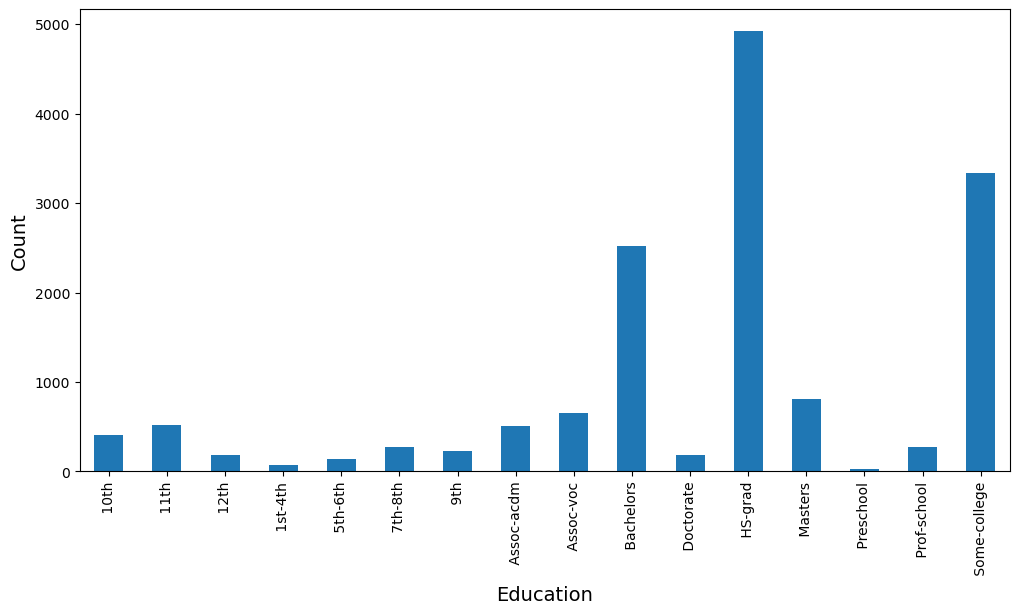

In [12]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['education']).mean().plot(kind='bar')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

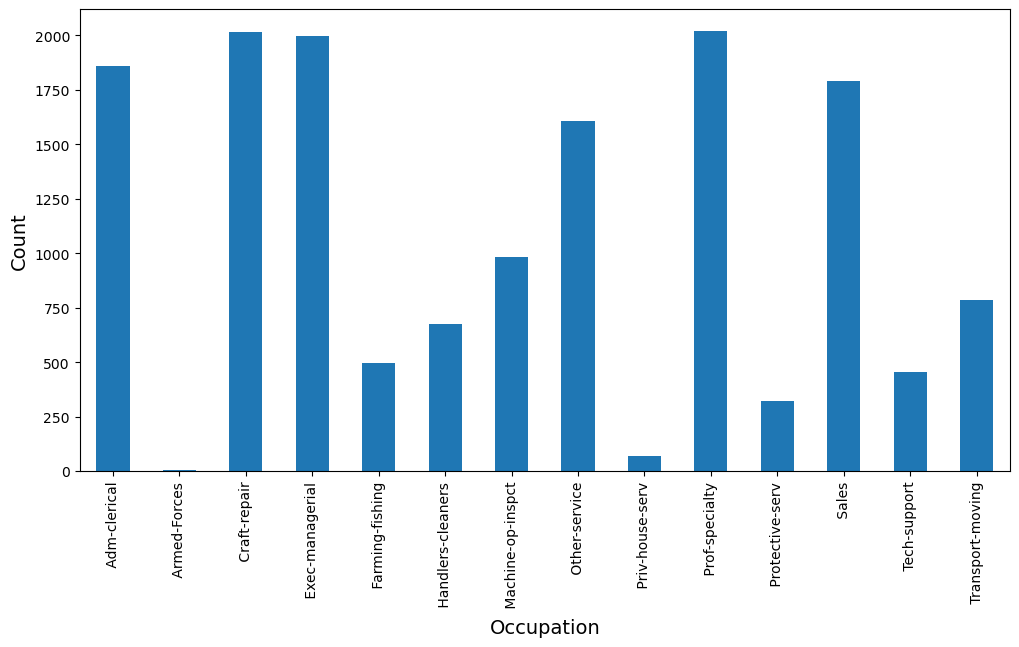

In [13]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['occupation']).mean().plot(kind='bar')
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

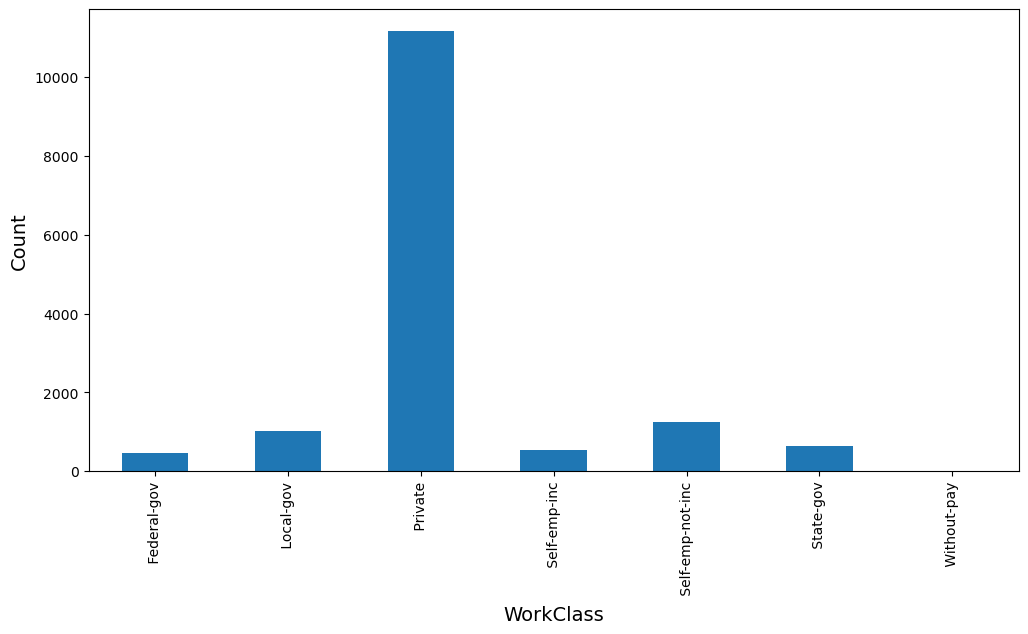

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['workclass']).mean().plot(kind='bar')
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

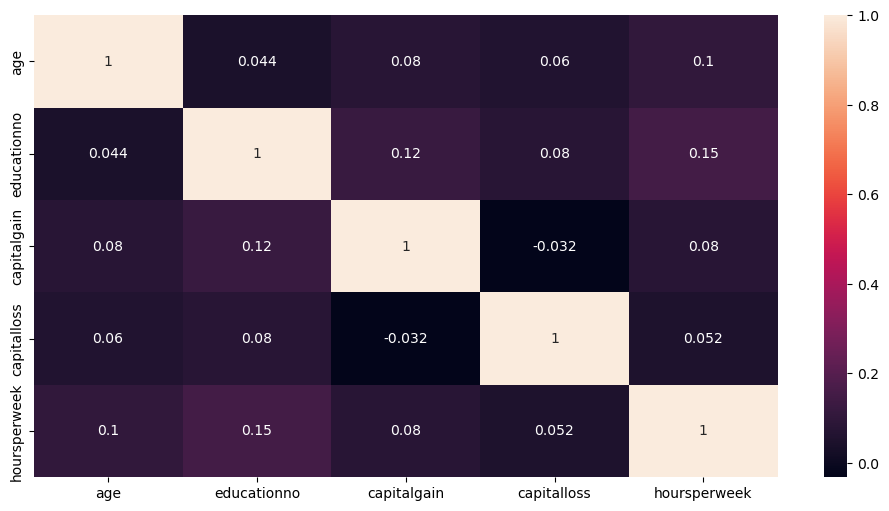

In [15]:
corr = train_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Outliers Detection

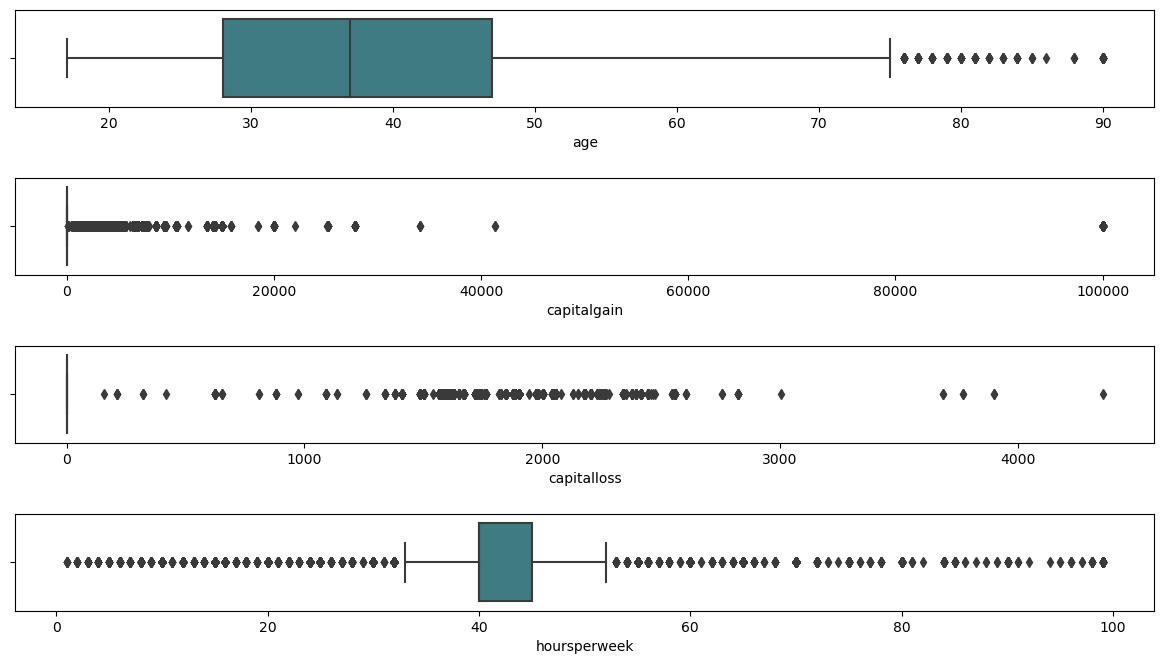

In [16]:
outlier1 = train_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

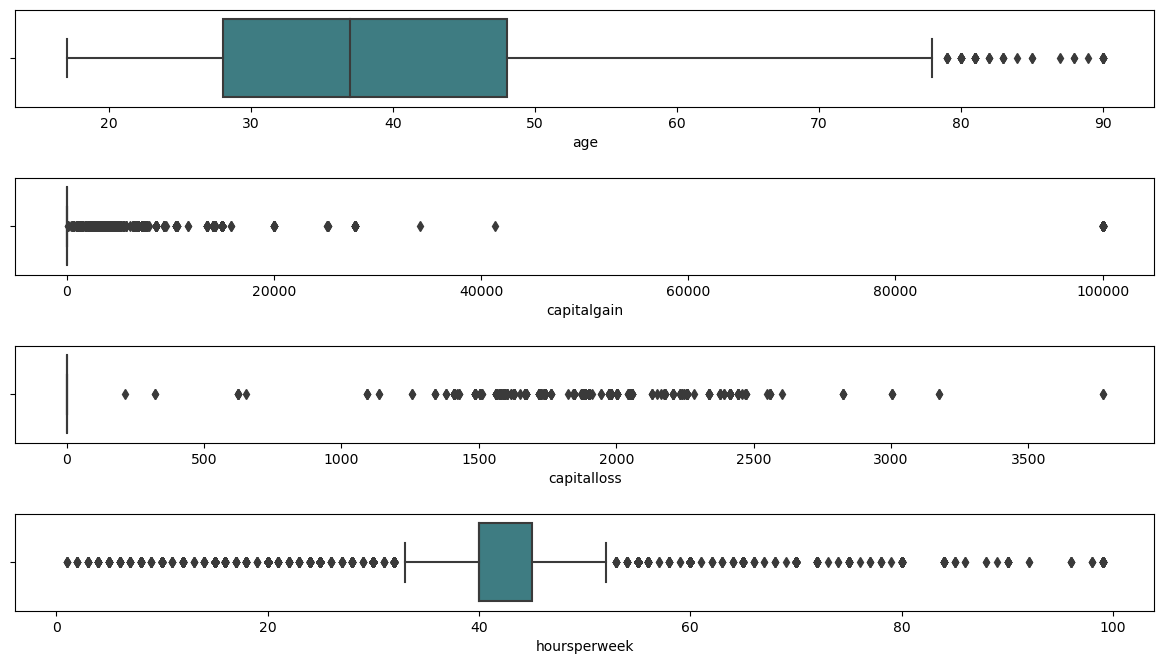

In [17]:
outlier2 = test_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [18]:
#There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

# Data Preprocessing

In [19]:
le=LabelEncoder()
train_data['workclass']=le.fit_transform(train_data['workclass'])
train_data['education']=le.fit_transform(train_data['education'])
train_data['maritalstatus']=le.fit_transform(train_data['maritalstatus'])
train_data['occupation']=le.fit_transform(train_data['occupation'])
train_data['relationship']=le.fit_transform(train_data['relationship'])
train_data['race']=le.fit_transform(train_data['race'])
train_data['sex']=le.fit_transform(train_data['sex'])
train_data['native']=le.fit_transform(train_data['native'])
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [20]:
train_data['Salary']=[0 if i.strip()=='<=50K' else 1 for i in train_data['Salary']]

In [21]:
test_data['workclass']=le.fit_transform(test_data['workclass'])
test_data['education']=le.fit_transform(test_data['education'])
test_data['maritalstatus']=le.fit_transform(test_data['maritalstatus'])
test_data['occupation']=le.fit_transform(test_data['occupation'])
test_data['relationship']=le.fit_transform(test_data['relationship'])
test_data['race']=le.fit_transform(test_data['race'])
test_data['sex']=le.fit_transform(test_data['sex'])
test_data['native']=le.fit_transform(test_data['native'])
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [22]:
test_data['Salary']=[0 if i.strip()=='<=50K' else 1 for i in test_data['Salary']]


# Model Building

In [23]:
X_train = train_data.drop(['Salary'],axis=1)
y_train = train_data[['Salary']]

X_test = test_data.drop(['Salary'],axis=1)
y_test = test_data[['Salary']]

In [24]:
print('X_train Shape :', X_train.shape)
print('y_train Shape :', y_train.shape)
print('X_test Shape  :', X_test.shape)
print('y_test Shape  :', y_test.shape)

X_train Shape : (30161, 13)
y_train Shape : (30161, 1)
X_test Shape  : (15060, 13)
y_test Shape  : (15060, 1)


# Model Training | Testing | Evaluation - SVM Model

In [25]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [26]:
y_pred = svc.predict(X_test)

In [27]:
print(confusion_matrix(y_test, y_pred))

[[10997   363]
 [ 2703   997]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



In [30]:
svc.score(X_train, y_train)

0.7960279831570571

In [31]:
svc.score(X_test, y_test)

0.7964143426294821

# Handling Imbalance Data

In [32]:
train_data['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [33]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

In [34]:
X_resampled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45301,32,2,11,9,2,11,0,4,1,0,0,45,37
45302,36,1,9,13,2,9,1,4,0,7688,0,40,37
45303,29,2,11,9,2,9,0,4,1,0,0,35,37
45304,37,2,8,12,2,6,0,4,1,0,0,40,37


In [35]:
y_resampled

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
45301,1
45302,1
45303,1
45304,1


In [36]:
y_resampled.value_counts()

Salary
0         22653
1         22653
dtype: int64

In [37]:
svc = SVC(C=2,gamma=0.01)
svc.fit(X_resampled,y_resampled)

SVC(C=2, gamma=0.01)

In [38]:
y_pred=svc.predict(X_test)

In [39]:
print(confusion_matrix(y_test,y_pred))

[[9257 2103]
 [ 650 3050]]


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87     11360
           1       0.59      0.82      0.69      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.82      0.78     15060
weighted avg       0.85      0.82      0.83     15060



In [41]:
svc.score(X_resampled,y_resampled)

0.8694433408378581

In [42]:
svc.score(X_test,y_test)

0.8171978751660026

# Feature Selection

In [43]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 7927.146247
Feature 1: 4.061261
Feature 2: 264.815807
Feature 3: 2178.317438
Feature 4: 982.227659
Feature 5: 218.597378
Feature 6: 3435.382731
Feature 7: 29.339535
Feature 8: 459.219298
Feature 9: 74124662.376269
Feature 10: 1258785.769299
Feature 11: 5569.194066
Feature 12: 16.707320


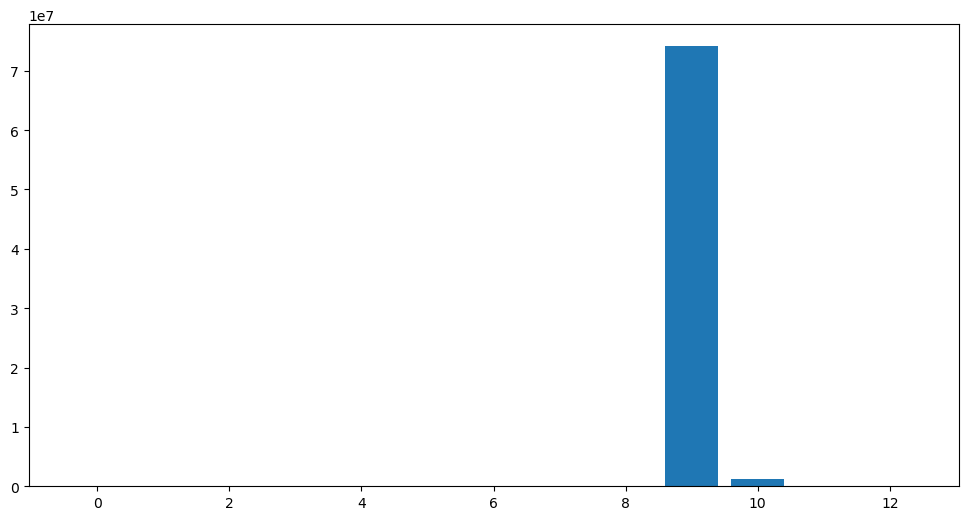

In [44]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [45]:
train_data_copy = train_data.copy()
train_data_copy.drop(train_data_copy.columns[[1,2,5,7,8,12]],axis=1,inplace=True)
train_data_copy

,age,educationno,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,4,1,2174,0,40,0
1,50,13,2,0,0,0,13,0
2,38,9,0,1,0,0,40,0
3,53,7,2,0,0,0,40,0
4,28,13,2,5,0,0,40,0
...,...,...,...,...,...,...,...,...
30156,27,12,2,5,0,0,38,0
30157,40,9,2,0,0,0,40,1
30158,58,9,6,4,0,0,40,0
30159,22,9,4,3,0,0,20,0


In [46]:
X_train = train_data_copy.drop(['Salary'],axis=1)
y_train = train_data_copy[['Salary']]

In [47]:
test_data_copy = test_data.copy()
test_data_copy.drop(test_data_copy.columns[[1,2,5,7,8,12]],axis=1,inplace=True)
test_data_copy

,age,educationno,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,4,3,0,0,40,0
1,38,9,2,0,0,0,50,0
2,28,12,2,0,0,0,40,1
3,44,10,2,0,7688,0,40,1
4,34,6,4,1,0,0,30,0
...,...,...,...,...,...,...,...,...
15055,33,13,4,3,0,0,40,0
15056,39,13,0,1,0,0,36,0
15057,38,13,2,0,0,0,50,0
15058,44,13,0,3,5455,0,40,0


In [48]:
X_test = test_data_copy.drop(['Salary'],axis=1)
y_test = test_data_copy[['Salary']]

# Model Training with Highly Relevant Features

In [49]:
#0.0001 < gamma < 10
#0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
#C parameter adds a penalty for each misclassified data point

In [50]:
svc=SVC(C=3.0, kernel='rbf', gamma=0.01, random_state=10)
svc.fit(X_train,y_train)

SVC(C=3.0, gamma=0.01, random_state=10)

In [51]:
y_pred=svc.predict(X_test)

In [53]:
print(confusion_matrix(y_test,y_pred))

[[10930   430]
 [ 1708  1992]]


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     11360
           1       0.82      0.54      0.65      3700

    accuracy                           0.86     15060
   macro avg       0.84      0.75      0.78     15060
weighted avg       0.85      0.86      0.85     15060



In [56]:
svc.score(X_train,y_train)

0.8616093630847783

In [57]:
svc.score(X_test,y_test)

0.8580345285524569

In [58]:
#SVM With GridSearch - take more time

# 2. Forest Fire

In [59]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


import warnings
warnings.filterwarnings(action='ignore')

In [60]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [61]:
df.shape

(517, 31)

In [62]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [64]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [65]:
pd.set_option("display.max_columns", 31)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


# Data Visualization

In [66]:
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

,size_category,counts
0,small,378
1,large,139


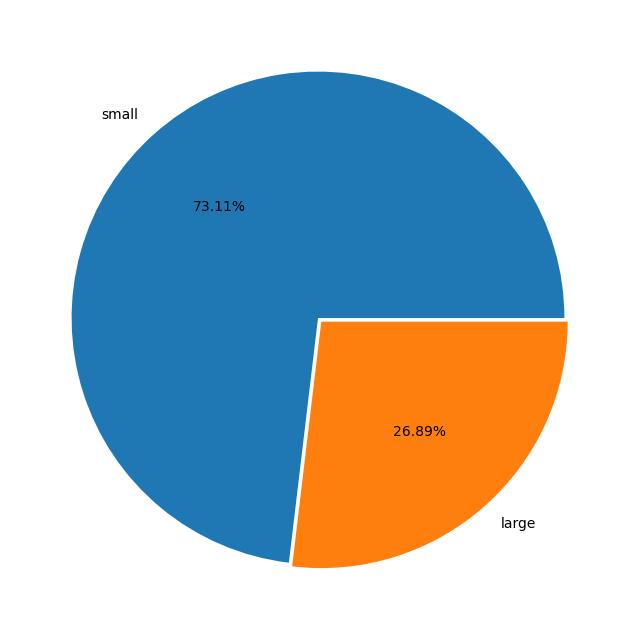

In [67]:
plt.figure(figsize=(8,8))
plt.pie(y_count.counts, labels=y_count['size_category'], autopct='%1.2f%%', explode=(0,0.02))
y_count

In [68]:
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


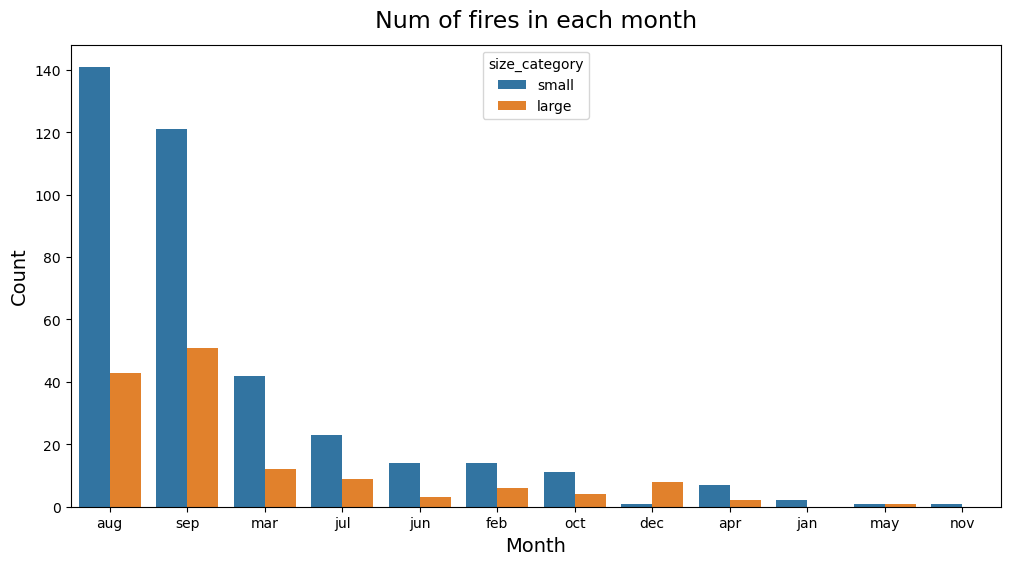

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [70]:
day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


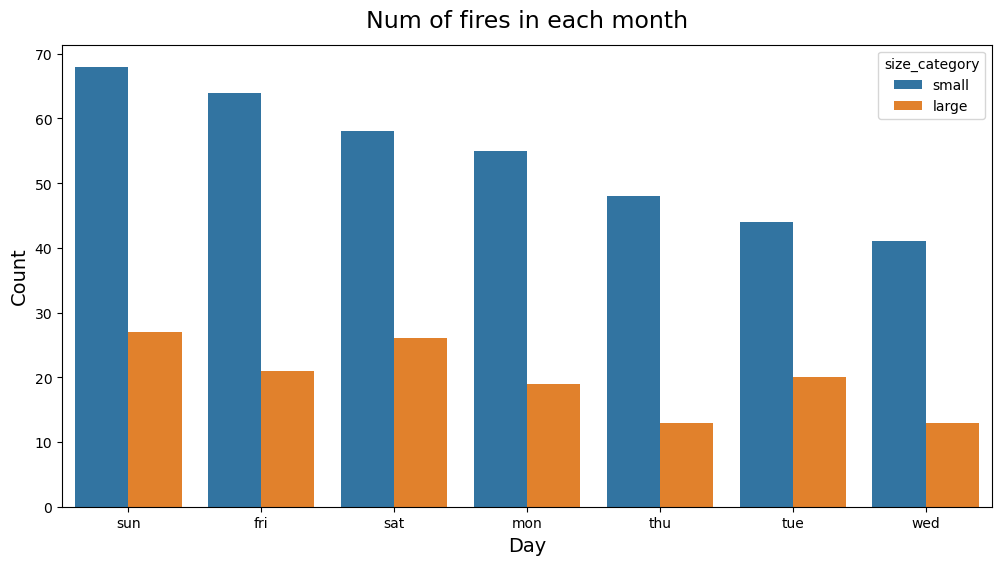

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x='day', y = 'count', hue='size_category', data= day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [72]:
#Label Encoder

In [73]:
labelencoder = LabelEncoder()
df.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1])
df['size_category']  #1 for small, 0 for large

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [74]:
rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


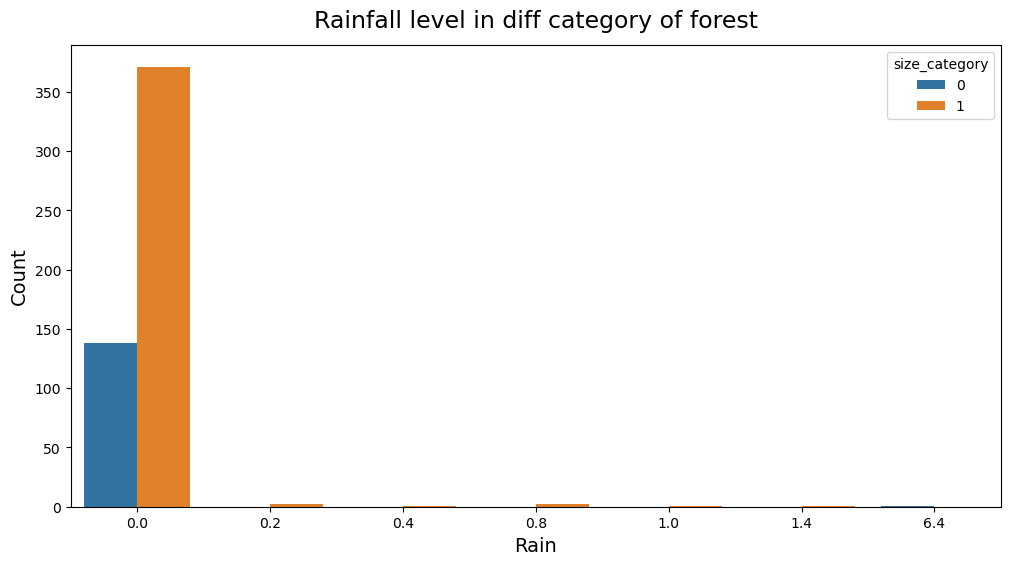

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(x='rain', y='count', hue='size_category', data= rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)
plt.xlabel('Rain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

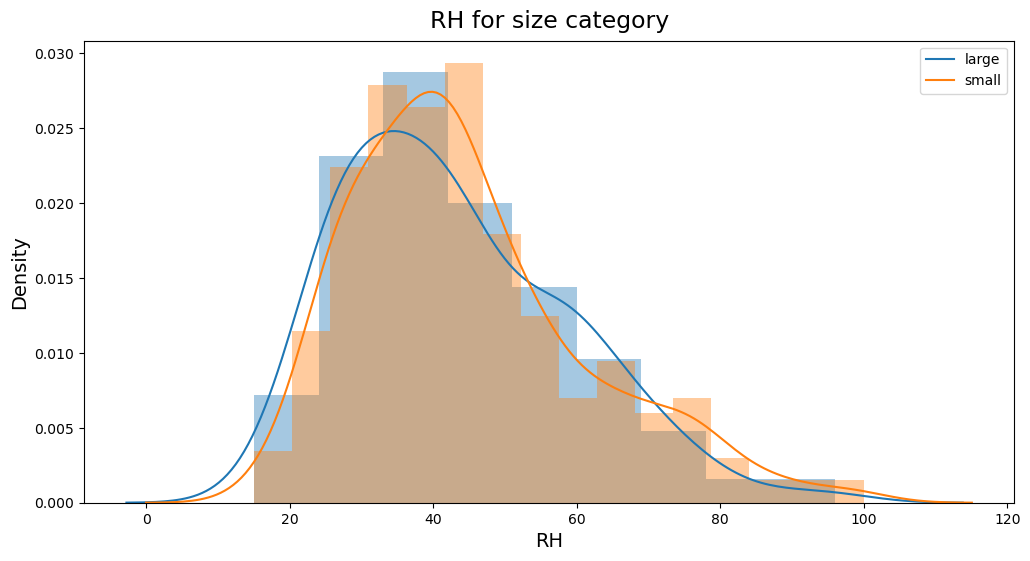

In [76]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['RH'])
sns.distplot(df[df['size_category']==1]['RH'])
plt.title("RH for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('RH', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

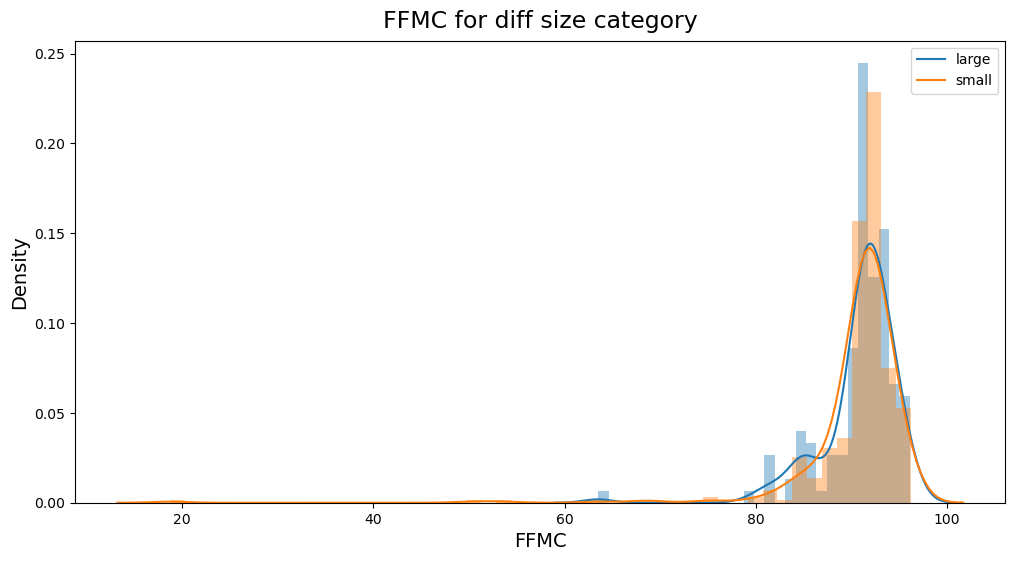

In [77]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['FFMC'])
sns.distplot(df[df['size_category']==1]['FFMC'])
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('FFMC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [78]:
#Highly skewed data.
#There are definitly outliers in this variable.

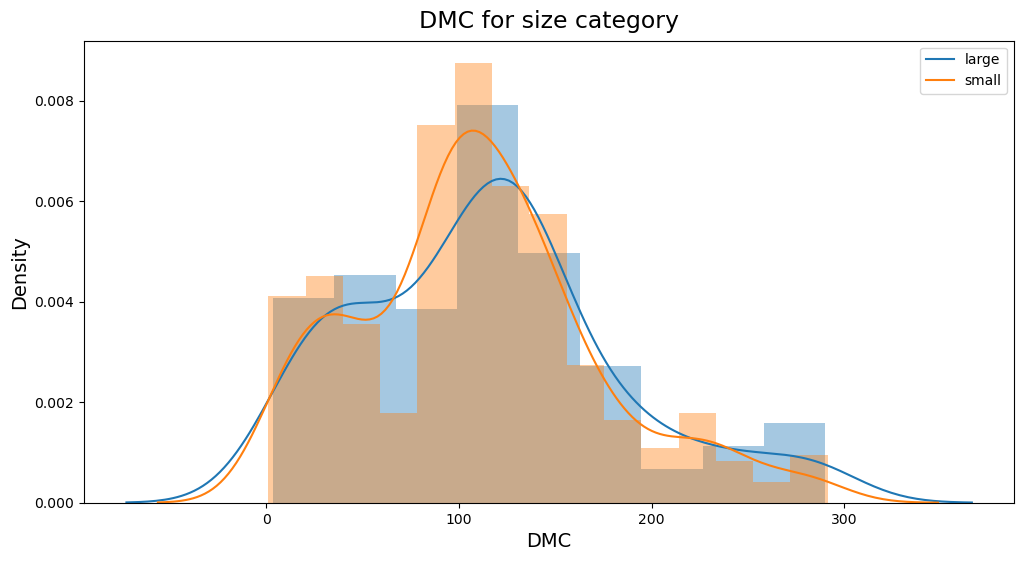

In [79]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['DMC'])
sns.distplot(df[df['size_category']==1]['DMC'])
plt.title("DMC for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('DMC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


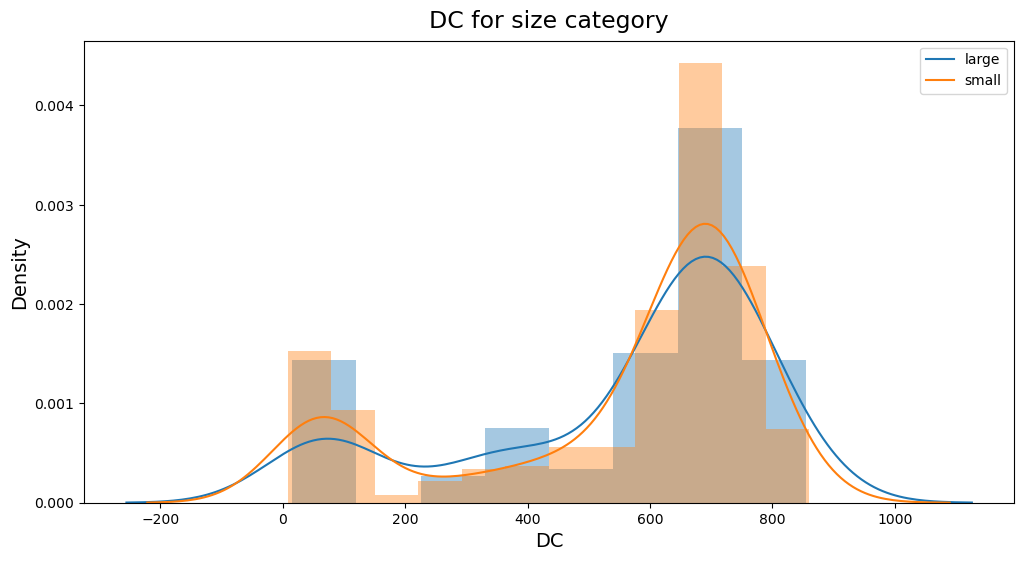

In [80]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['DC'])
sns.distplot(df[df['size_category']==1]['DC'])
plt.title("DC for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('DC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [81]:
#Highly skewed data.
#Outliers are present.

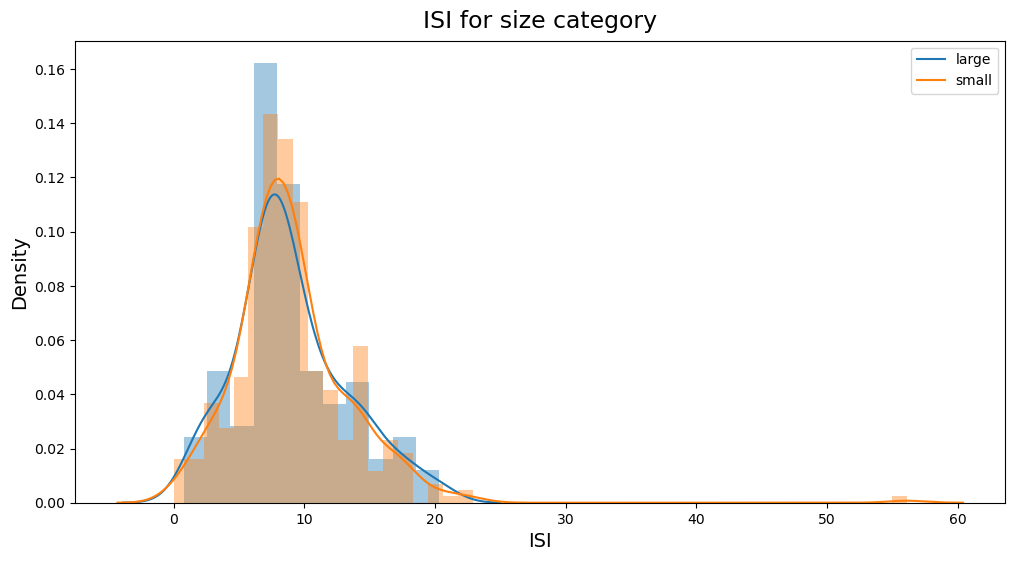

In [82]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['ISI'])
sns.distplot(df[df['size_category']==1]['ISI'])
plt.title("ISI for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('ISI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

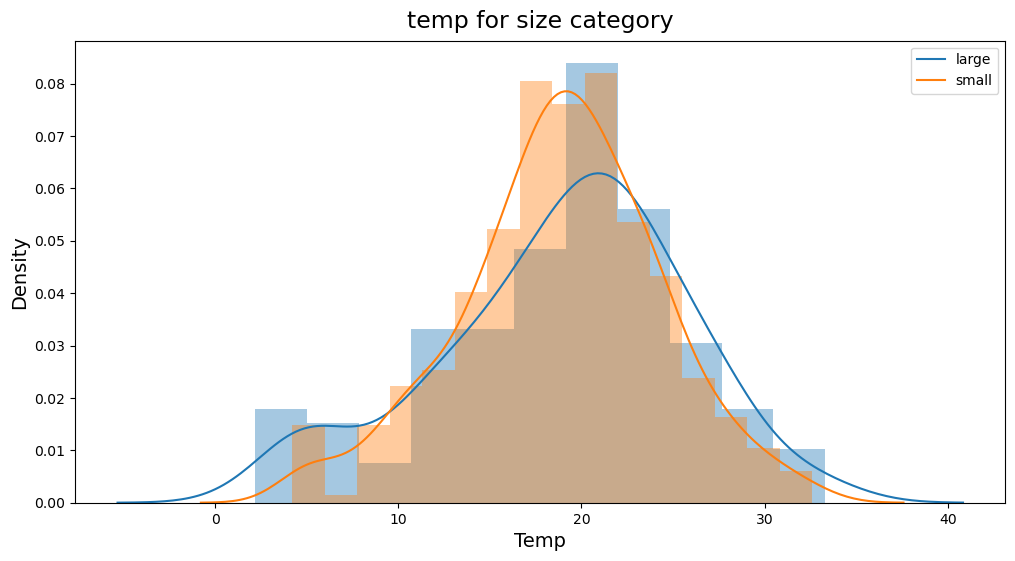

In [83]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['temp'])
sns.distplot(df[df['size_category']==1]['temp'])
plt.title("temp for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Temp', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [84]:
#Fairly Normal distribution.
#Large forest fire has slighly higher temp than small forest fires.

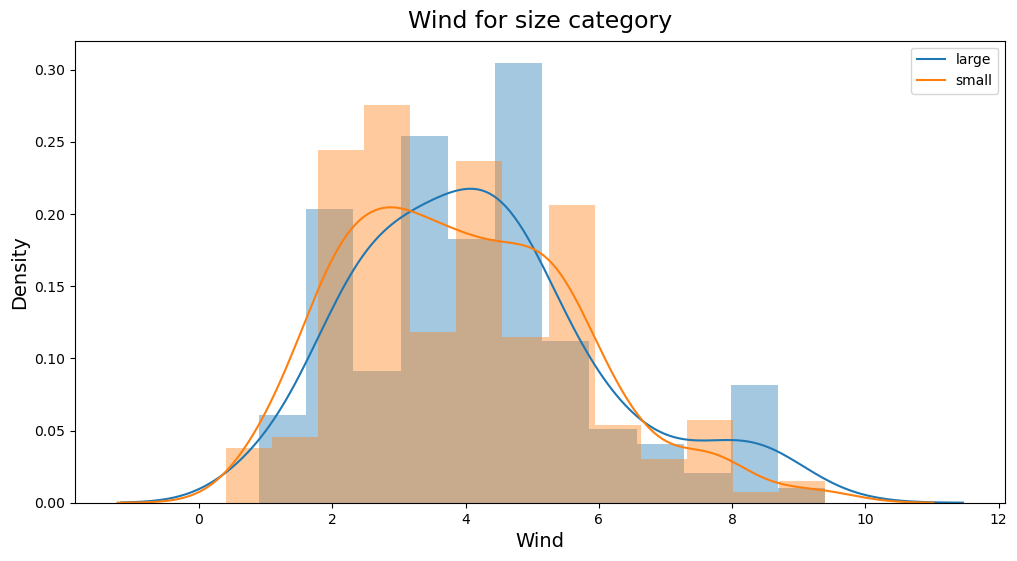

In [85]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['wind'])
sns.distplot(df[df['size_category']==1]['wind'])
plt.title("Wind for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Wind', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

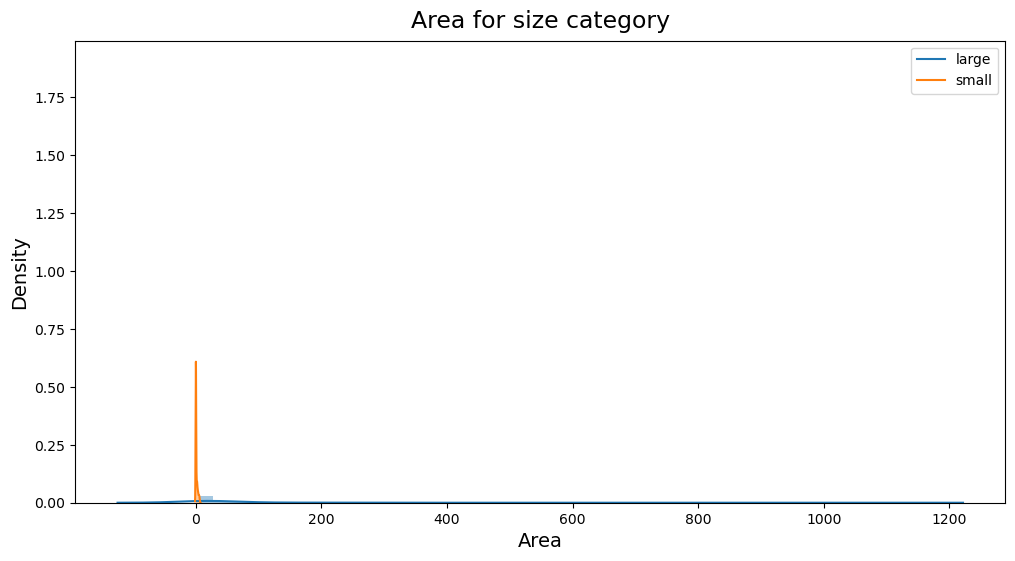

In [86]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['area'])
sns.distplot(df[df['size_category']==1]['area'])
plt.title("Area for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Area', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [87]:
#Large the forest area, larger the fire. So we can see, area large area forest are coming under large forest fire category.

# Outliers Detection

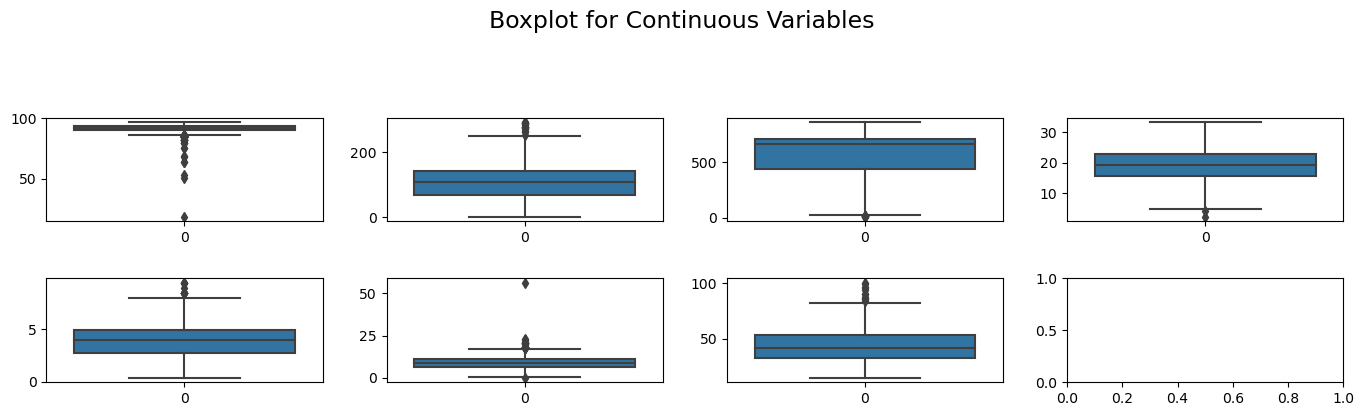

In [88]:
fig, ax=plt.subplots(2,4, figsize=(14,4), sharex= False, sharey = False)
sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.temp, ax=ax[0,3])
sns.boxplot(df.wind, ax=ax[1,0])
sns.boxplot(df.ISI, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [89]:
#Let try to treat outliers by log transformations

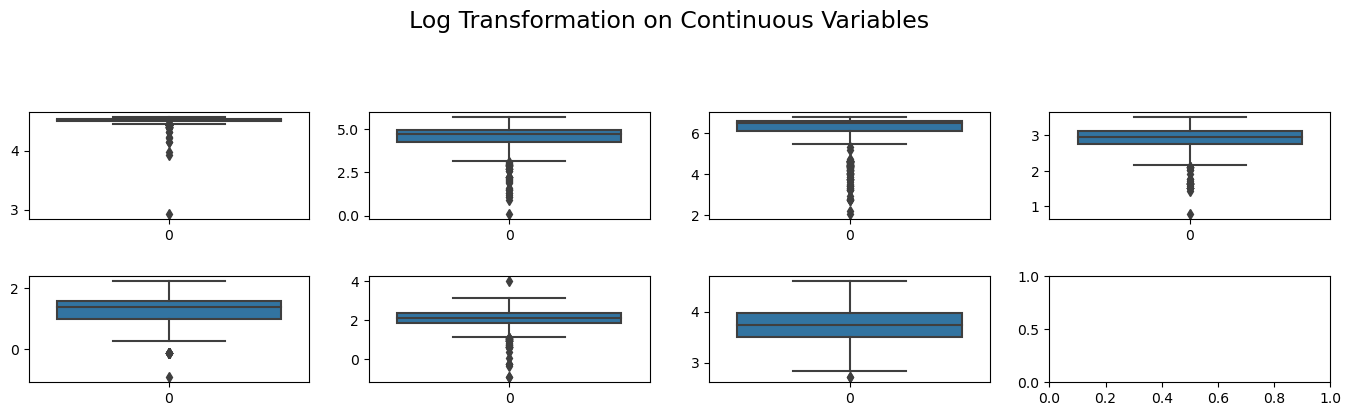

In [90]:
fig, ax=plt.subplots(2,4, figsize=(14,4), sharex= False, sharey = False)
sns.boxplot(np.log(df.FFMC), ax=ax[0,0])
sns.boxplot(np.log(df.DMC), ax=ax[0,1])
sns.boxplot(np.log(df.DC), ax=ax[0,2])
sns.boxplot(np.log(df.temp), ax=ax[0,3])
sns.boxplot(np.log(df.wind), ax=ax[1,0])
sns.boxplot(np.log(df.ISI), ax=ax[1,1])
sns.boxplot(np.log(df.RH), ax=ax[1,2])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [91]:
#Let try to treat our outliers by sqrt tranformations

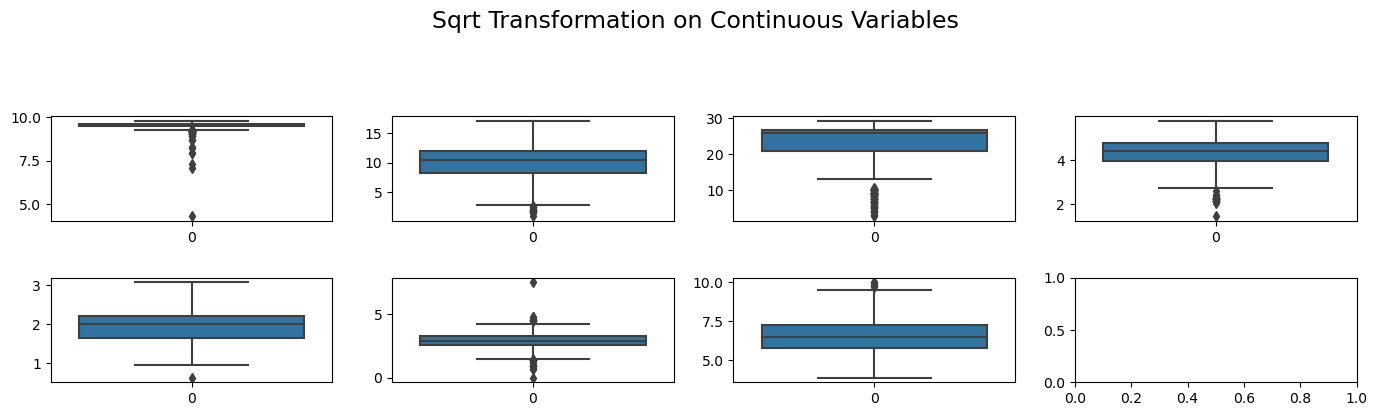

In [92]:
fig, ax=plt.subplots(2,4, figsize=(14,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.sqrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.sqrt(df.DC), ax=ax[0,2])
sns.boxplot(np.sqrt(df.temp), ax=ax[0,3])
sns.boxplot(np.sqrt(df.wind), ax=ax[1,0])
sns.boxplot(np.sqrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.sqrt(df.RH), ax=ax[1,2])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [93]:
#Let try to treat our outliers by cbrt tranformations

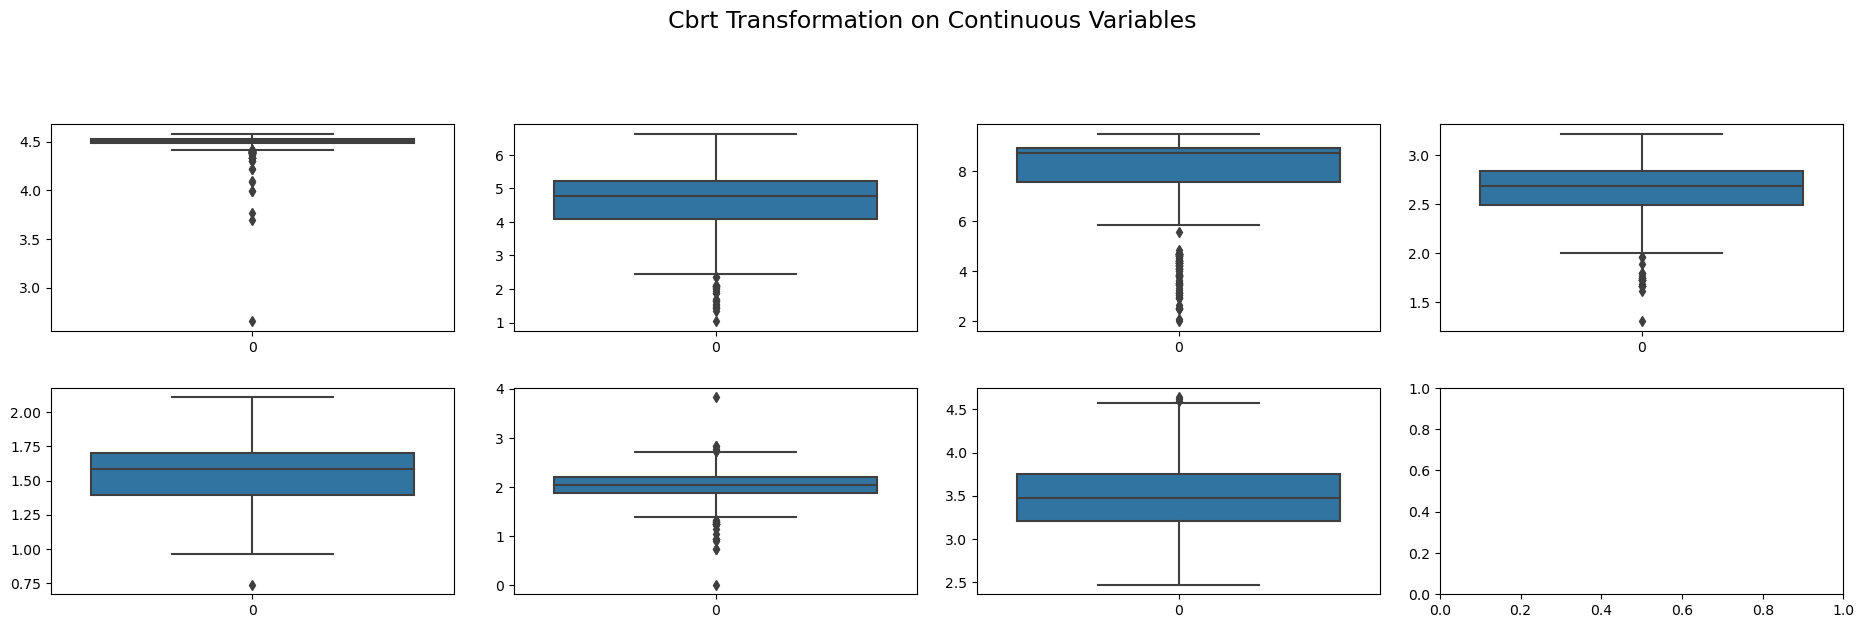

In [94]:
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.cbrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.cbrt(df.DC), ax=ax[0,2])
sns.boxplot(np.cbrt(df.temp), ax=ax[0,3])
sns.boxplot(np.cbrt(df.wind), ax=ax[1,0])
sns.boxplot(np.cbrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.cbrt(df.RH), ax=ax[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [95]:
#None of the helpful to treat outliers in any of the features.

In [96]:
#Dependency of Target variable on diff Features

In [97]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [98]:
#To get correlation of target variable with numerical columns

In [99]:
df1 = df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [100]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


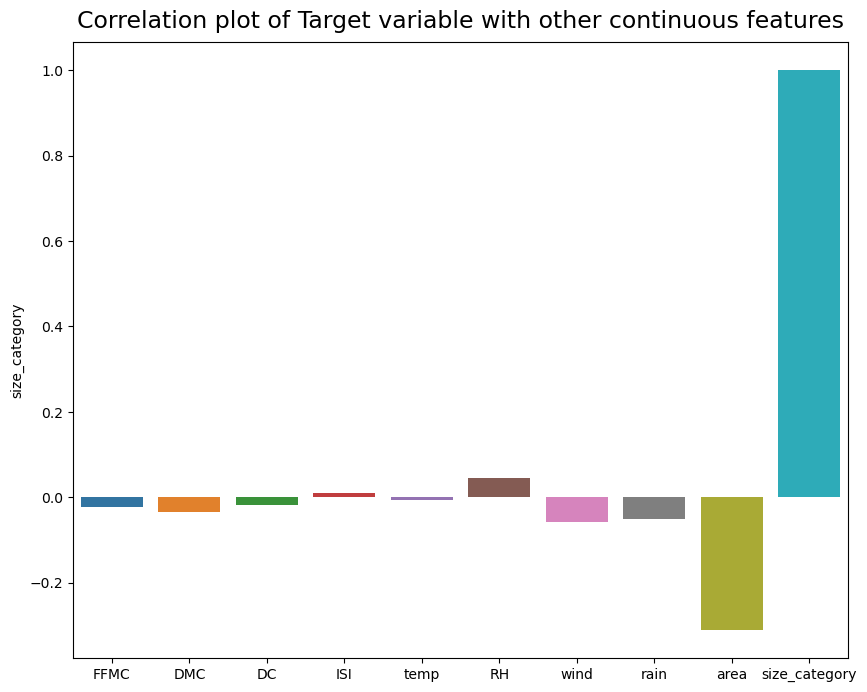

In [101]:
fig , ax = plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)
plt.show()

In [102]:
#Highest corr of size_category has with area of forest.
#Then ranks wind.

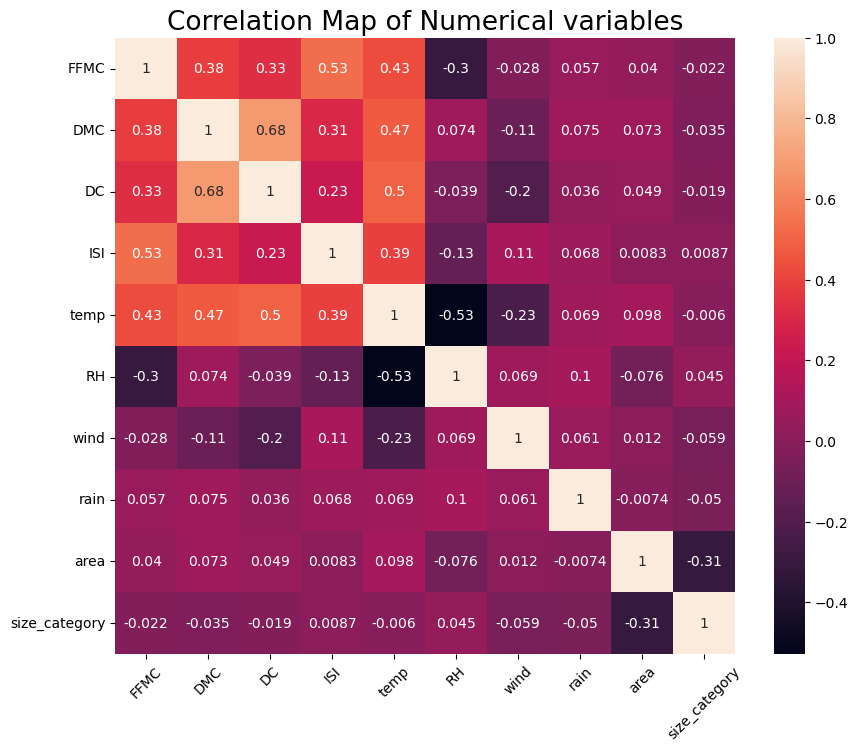

In [103]:
fig= plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19);

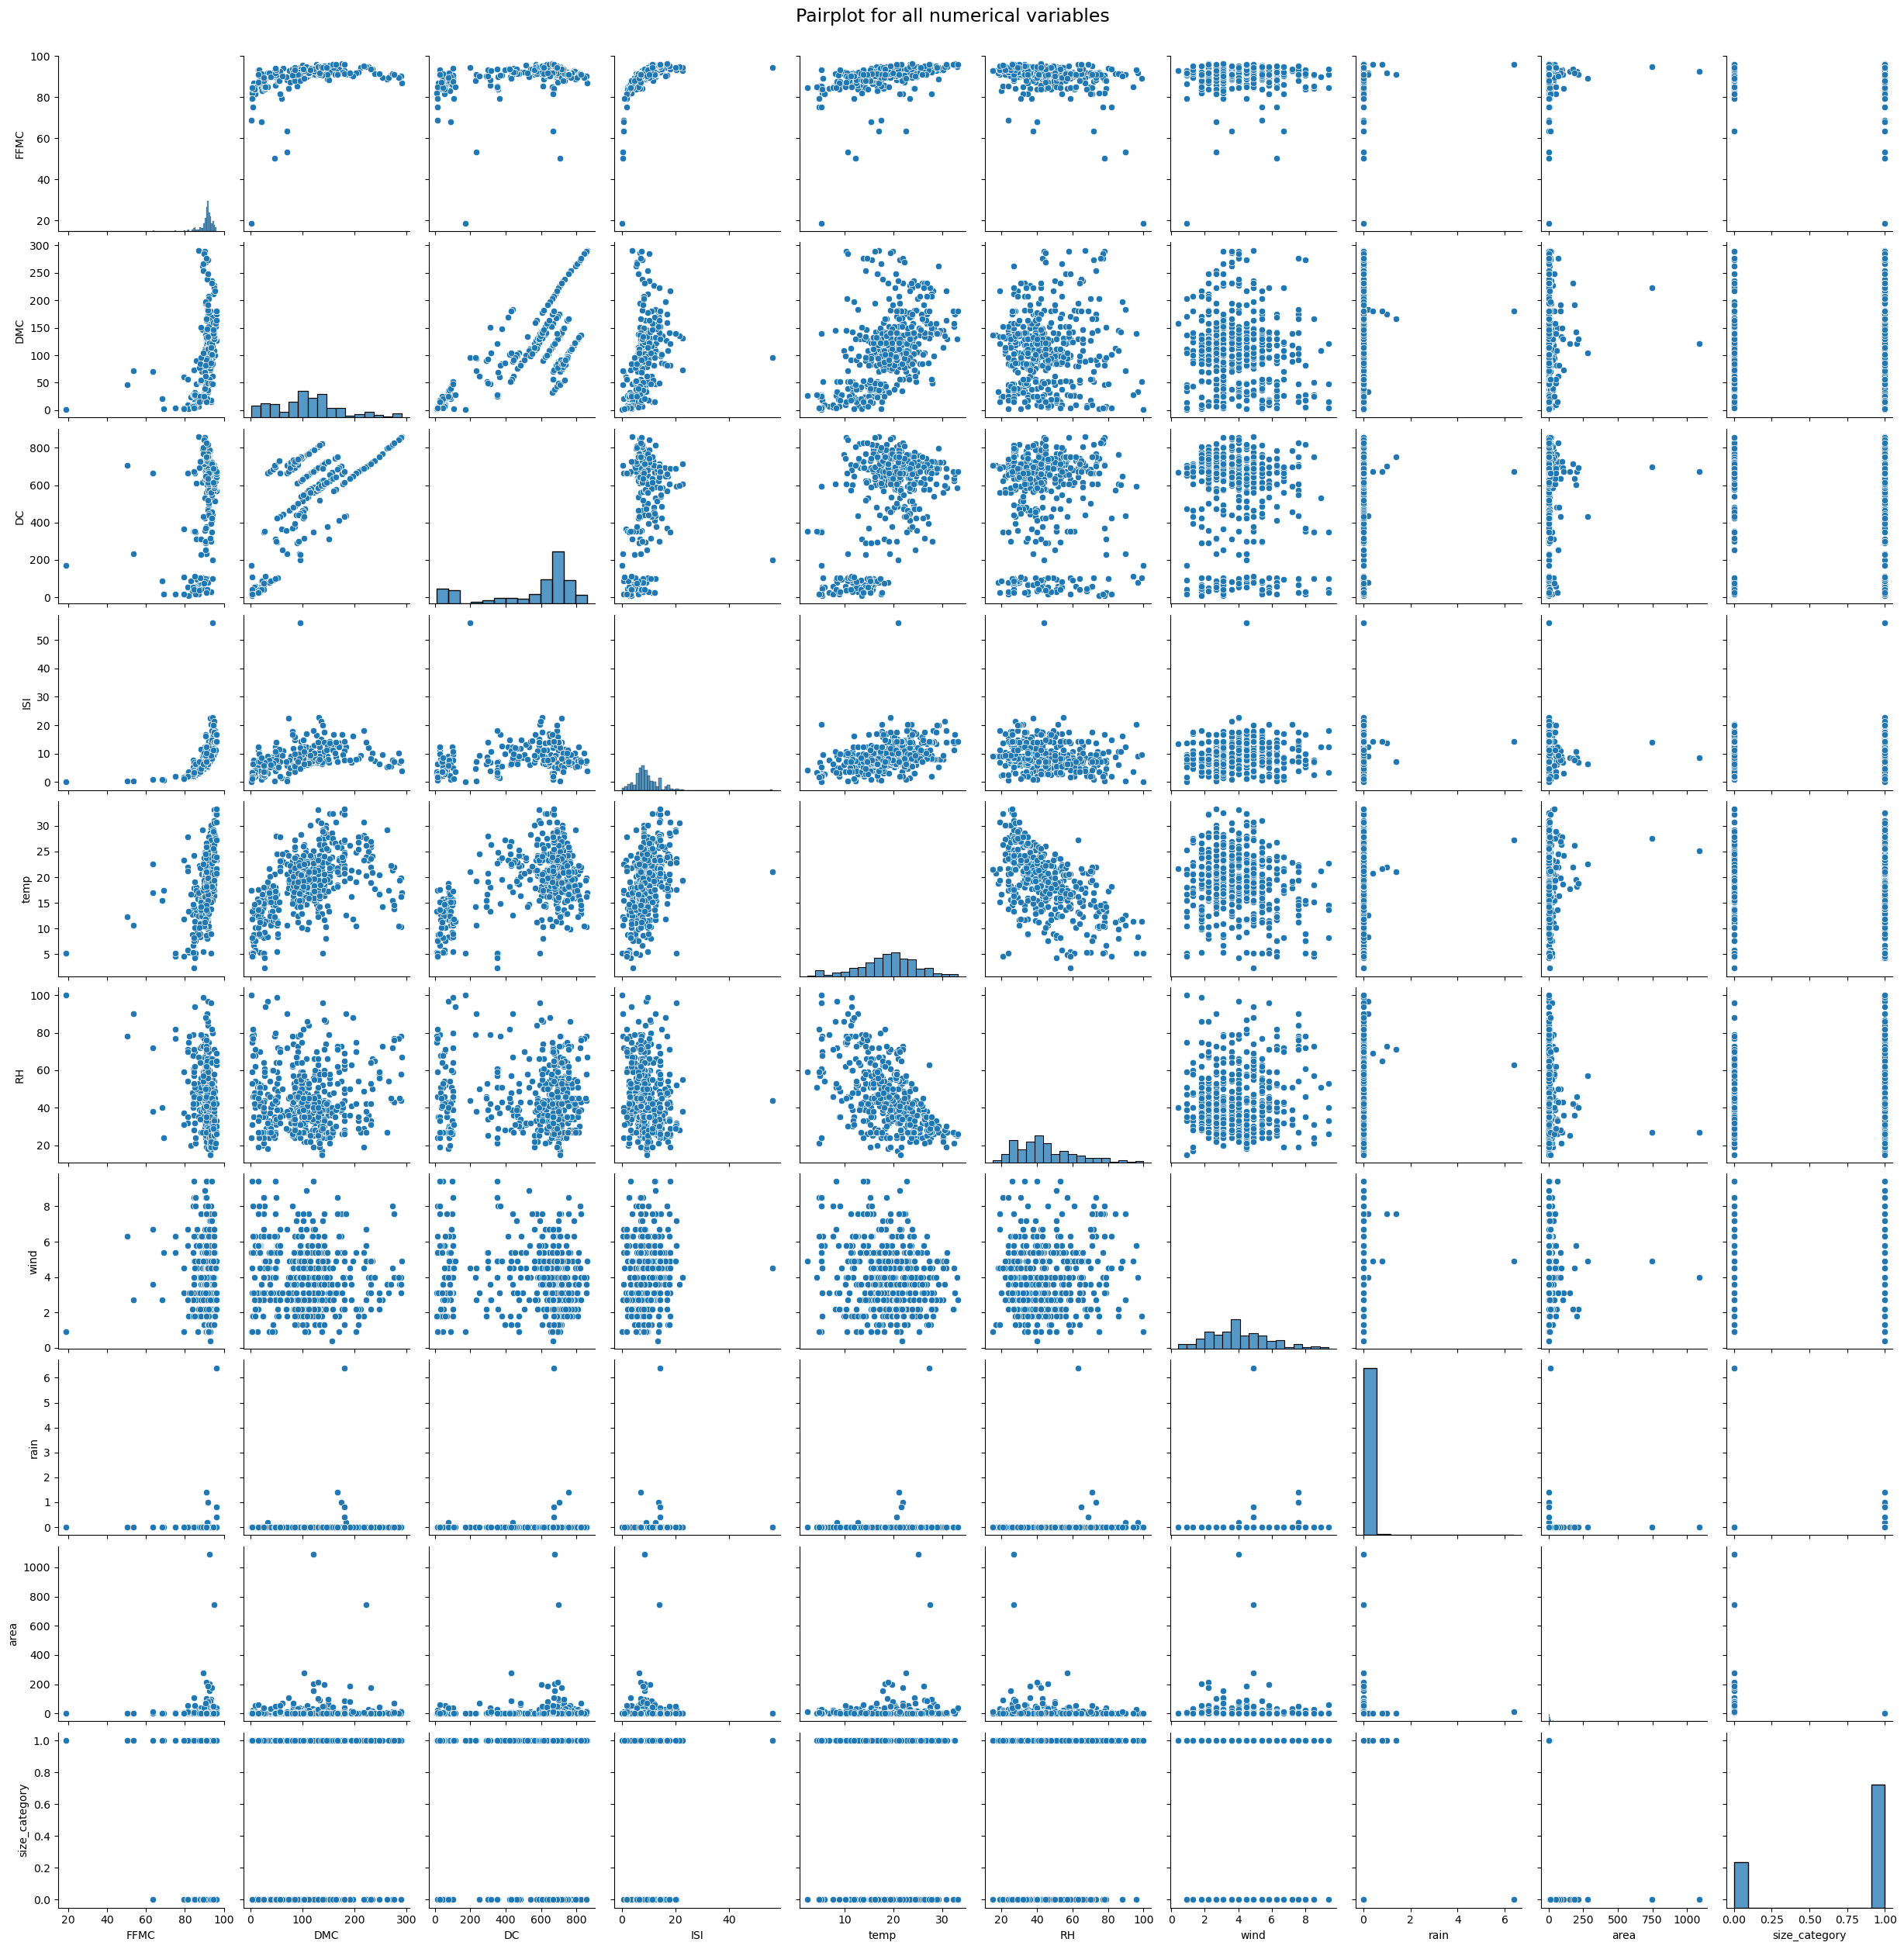

In [104]:
sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)
plt.show()

# Data Preprocessing

In [105]:
#Drop the unnecessary columns
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)

In [106]:
pd.set_option("display.max_columns", 27)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [107]:
#check the outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]

In [108]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
469,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,-1


In [109]:
#utliers dataset gives the outliers in our data, and we need to remove these to improve our model.


In [110]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [111]:
df.drop([281, 299, 379, 463, 464, 469], axis=0, inplace=True)

In [113]:
df.shape

(511, 27)

# Splitting data into target variable and independent variables

In [114]:
x = df.drop('size_category', axis=1)
y = df['size_category']

In [115]:
#Converting independent features into normalised and standardized data
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)   # data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)     # data between -1 to +1

In [116]:
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-1.152145,-1.349327,-1.872882,-0.883826,-1.903660,0.439490,1.531449,-0.073700,-0.200487,2.238697,-0.440369,-0.471686,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302
1,-0.080103,-1.204539,0.475150,-0.529429,-0.180137,-0.692844,-1.758092,-0.073700,-0.200487,-0.446688,-0.440369,-0.471686,-0.368179,2.716072,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,5.750362,-0.712302
2,-0.080103,-1.073914,0.547862,-0.529429,-0.778094,-0.692844,-1.531227,-0.073700,-0.200487,-0.446688,2.270821,-0.471686,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,5.750362,-0.712302
3,0.187908,-1.237588,-1.941509,-0.019983,-1.886073,3.333233,0.000111,0.598809,-0.200487,2.238697,-0.440369,-0.471686,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302
4,-0.396842,-0.954306,-1.840611,0.112916,-1.340877,3.459048,-1.247646,-0.073700,-0.200487,-0.446688,-0.440369,2.120053,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302


# Model Building

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [118]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((383, 26), (128, 26), (383,), (128,))

# Model Training | Testing | Evaluation

In [119]:
#kernel = rbf
clf = SVC()
param_grids = [{'kernel':['rbf'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['rbf']}])

In [120]:
grid.best_score_, grid.best_params_

(0.8492105263157894, {'C': 15, 'kernel': 'rbf'})

In [121]:
#rbf kernel with gamma as scale
clf=SVC(kernel='rbf', C=13, gamma = 'scale')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred)

Test Accuracy  = 78.125
Train Accuracy = 93.99477806788512


array([[20, 14],
       [14, 80]], dtype=int64)

In [122]:
#rbf kernel with gamma as auto
clf=SVC(kernel='rbf', C=13, gamma = 'auto')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred)

Test Accuracy  = 78.125
Train Accuracy = 93.99477806788512


array([[20, 14],
       [14, 80]], dtype=int64)

In [123]:
#Kernel = Polynomial
clf = SVC()
param_grids = [{'kernel':['poly'], 'degree':[0,1,2,3,4,5,6], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'degree': [0, 1, 2, 3, 4, 5, 6],
                          'kernel': ['poly']}])

In [124]:
grid.best_score_, grid.best_params_

(0.8830263157894735, {'C': 15, 'degree': 1, 'kernel': 'poly'})

In [125]:
clf_p=SVC(kernel='poly', C=15, degree =1 )
clf_p.fit(x_train, y_train)
y_pred_p = clf_p.predict(x_test)
y_pred1 = clf_p.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred_p)


Test Accuracy  = 78.125
Train Accuracy = 89.03394255874673


array([[17, 17],
       [ 1, 93]], dtype=int64)

In [127]:
#Kernel = Linear
clf = SVC()
param_grids = [{'kernel':['linear'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['linear']}])

In [128]:
grid.best_score_, grid.best_params_

(0.9609986504723347, {'C': 14, 'kernel': 'linear'})

In [129]:
clf_l=SVC(kernel='linear', C=11)
clf_l.fit(x_train, y_train)
y_pred_l = clf_l.predict(x_test)
acc = accuracy_score(y_pred_l, y_test)*100
y_pred1 = clf_l.predict(x_train)
acc1= accuracy_score(y_pred1, y_train)*100
print("Test Accuracy  =" , acc)
print("Train Accuracy =", acc1)
confusion_matrix(y_test, y_pred_l)

Test Accuracy  = 96.875
Train Accuracy = 97.12793733681463


array([[32,  2],
       [ 2, 92]], dtype=int64)

In [130]:
#It is clearly evident that our linear kernel model of SVC is giving us the highest accuracy.

#Hence we will be using it as our model.